In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
size = np.loadtxt("data/size.dat", delimiter=",")
mcs = np.loadtxt("data/mcs.dat", delimiter=",")
configs = np.loadtxt("data/configs.dat", delimiter=",")


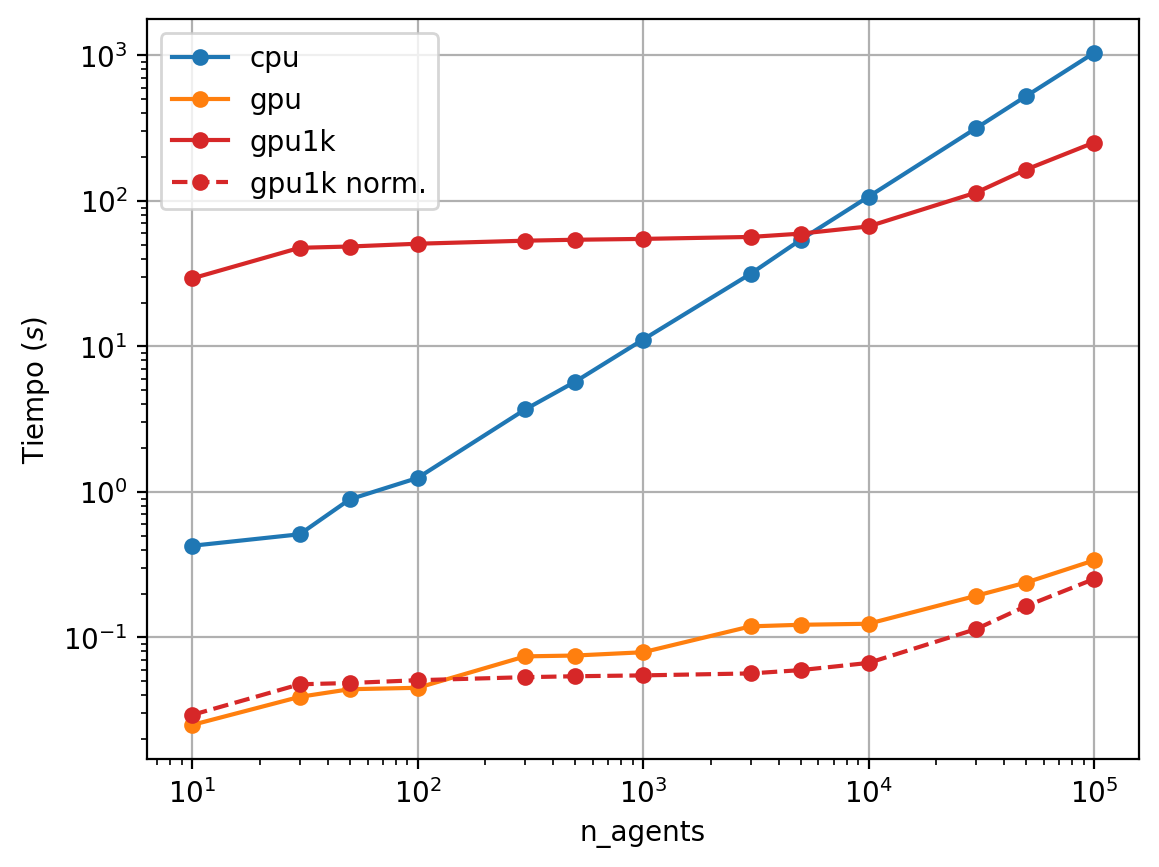

In [35]:
fig = plt.figure(dpi=200)
plt.plot(size[:, 0], size[:, 1], label="cpu", marker='o', markersize=5)
plt.plot(size[:, 0], size[:, 2], label="gpu", marker='o', markersize=5)
plt.plot(size[:, 0], size[:, 3], label="gpu1k", color='#d62728', marker='o', markersize=5)
plt.plot(size[:, 0], size[:, 3]/1000, label="gpu1k norm.", linestyle="dashed", color='#d62728', marker='o', markersize=5)

plt.xscale("log")
plt.xlabel("n_agents")
plt.yscale("log")
plt.ylabel("Tiempo ($s$)")
plt.legend()
plt.grid()

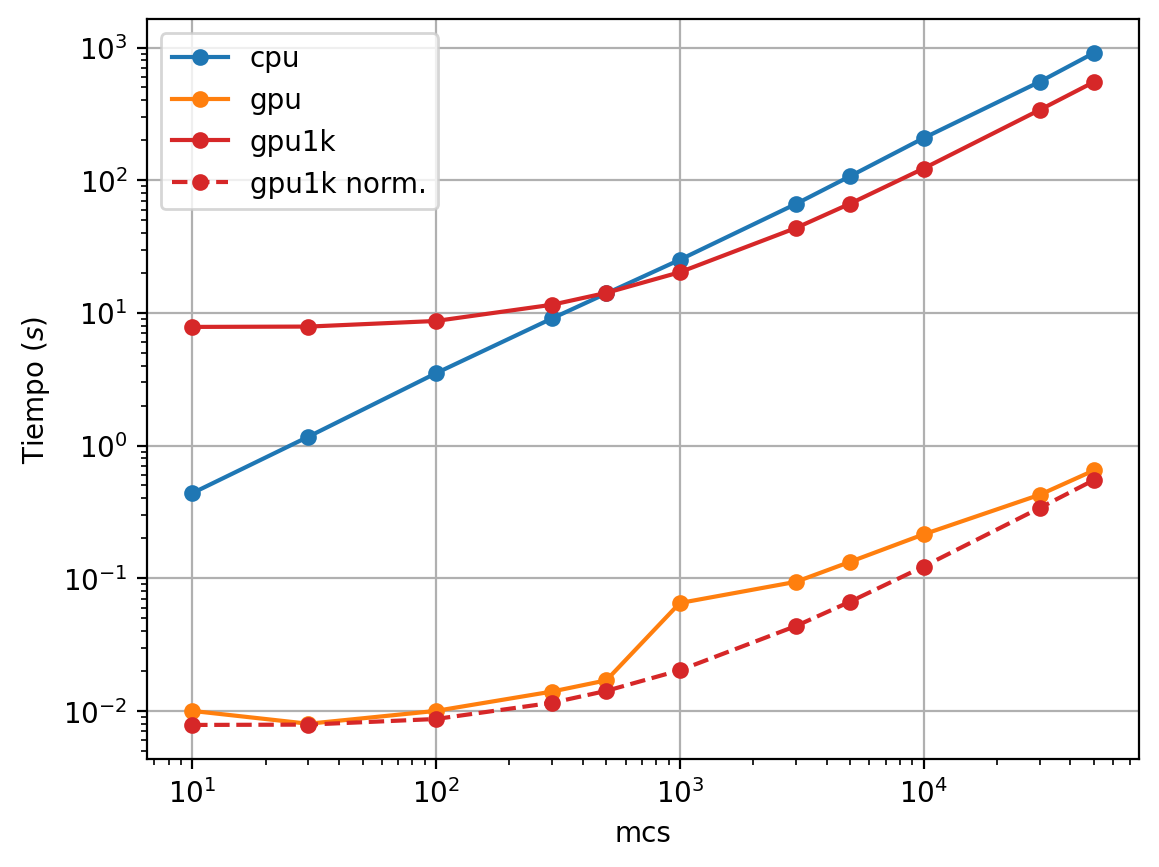

In [34]:
fig = plt.figure(dpi=200)
plt.plot(mcs[:, 0], mcs[:, 1], label="cpu", marker='o', markersize=5)
plt.plot(mcs[:, 0], mcs[:, 2], label="gpu", marker='o', markersize=5)
plt.plot(mcs[:, 0], mcs[:, 3], label="gpu1k", color='#d62728', marker='o', markersize=5)
plt.plot(mcs[:, 0], mcs[:, 3]/1000, label="gpu1k norm.", linestyle="dashed", color='#d62728', marker='o', markersize=5)

plt.xscale("log")
plt.xlabel("mcs")
plt.yscale("log")
plt.ylabel("Tiempo ($s$)")
plt.legend()
plt.grid()

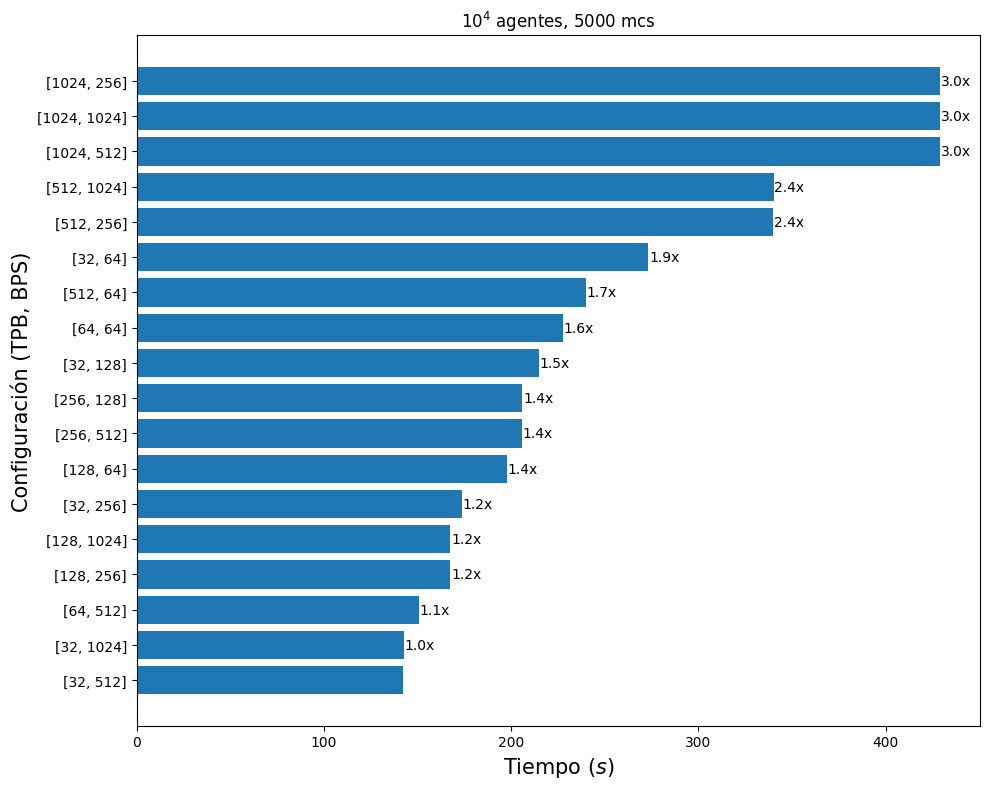

In [33]:
# Configuration and runtime data
indices = list(range(6)) + [8, 10, 12, 14, 16, 18, 20, 22, 24] + list(range(27, 30))
configurations = [[int(configs[i, 0]), int(configs[i, 1])] for i in indices]
runtimes = configs[indices, 3] 

# Sort configurations and runtimes in ascending order of runtimes
sorted_indices = np.argsort(runtimes)
sorted_configurations = [configurations[i] for i in sorted_indices]
sorted_runtimes = [runtimes[i] for i in sorted_indices]

# Calculate the relative speed compared to the fastest configuration
relative_speeds = [runtime / sorted_runtimes[0] for runtime in sorted_runtimes]

# Plotting the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
y = np.arange(len(sorted_configurations))
ax.barh(y, sorted_runtimes)

# Set the y-axis tick labels as configurations
config_labels = [str(config) for config in sorted_configurations]
ax.set_yticks(y)
ax.set_yticklabels(config_labels)

# Display the relative speed next to each bar
for i, speed in enumerate(relative_speeds):
    if i == 0:
        continue
    ax.text(sorted_runtimes[i] + 0.5, y[i], f'{speed:.1f}x', va='center')

# Add labels and title
ax.set_xlabel('Tiempo ($s$)', fontsize=15)
ax.set_ylabel('Configuración (TPB, BPS)', fontsize=15)
ax.set_title('$10^4$ agentes, 5000 mcs')
# Show the plot
plt.tight_layout()
plt.show()


Conectividad: 5.43


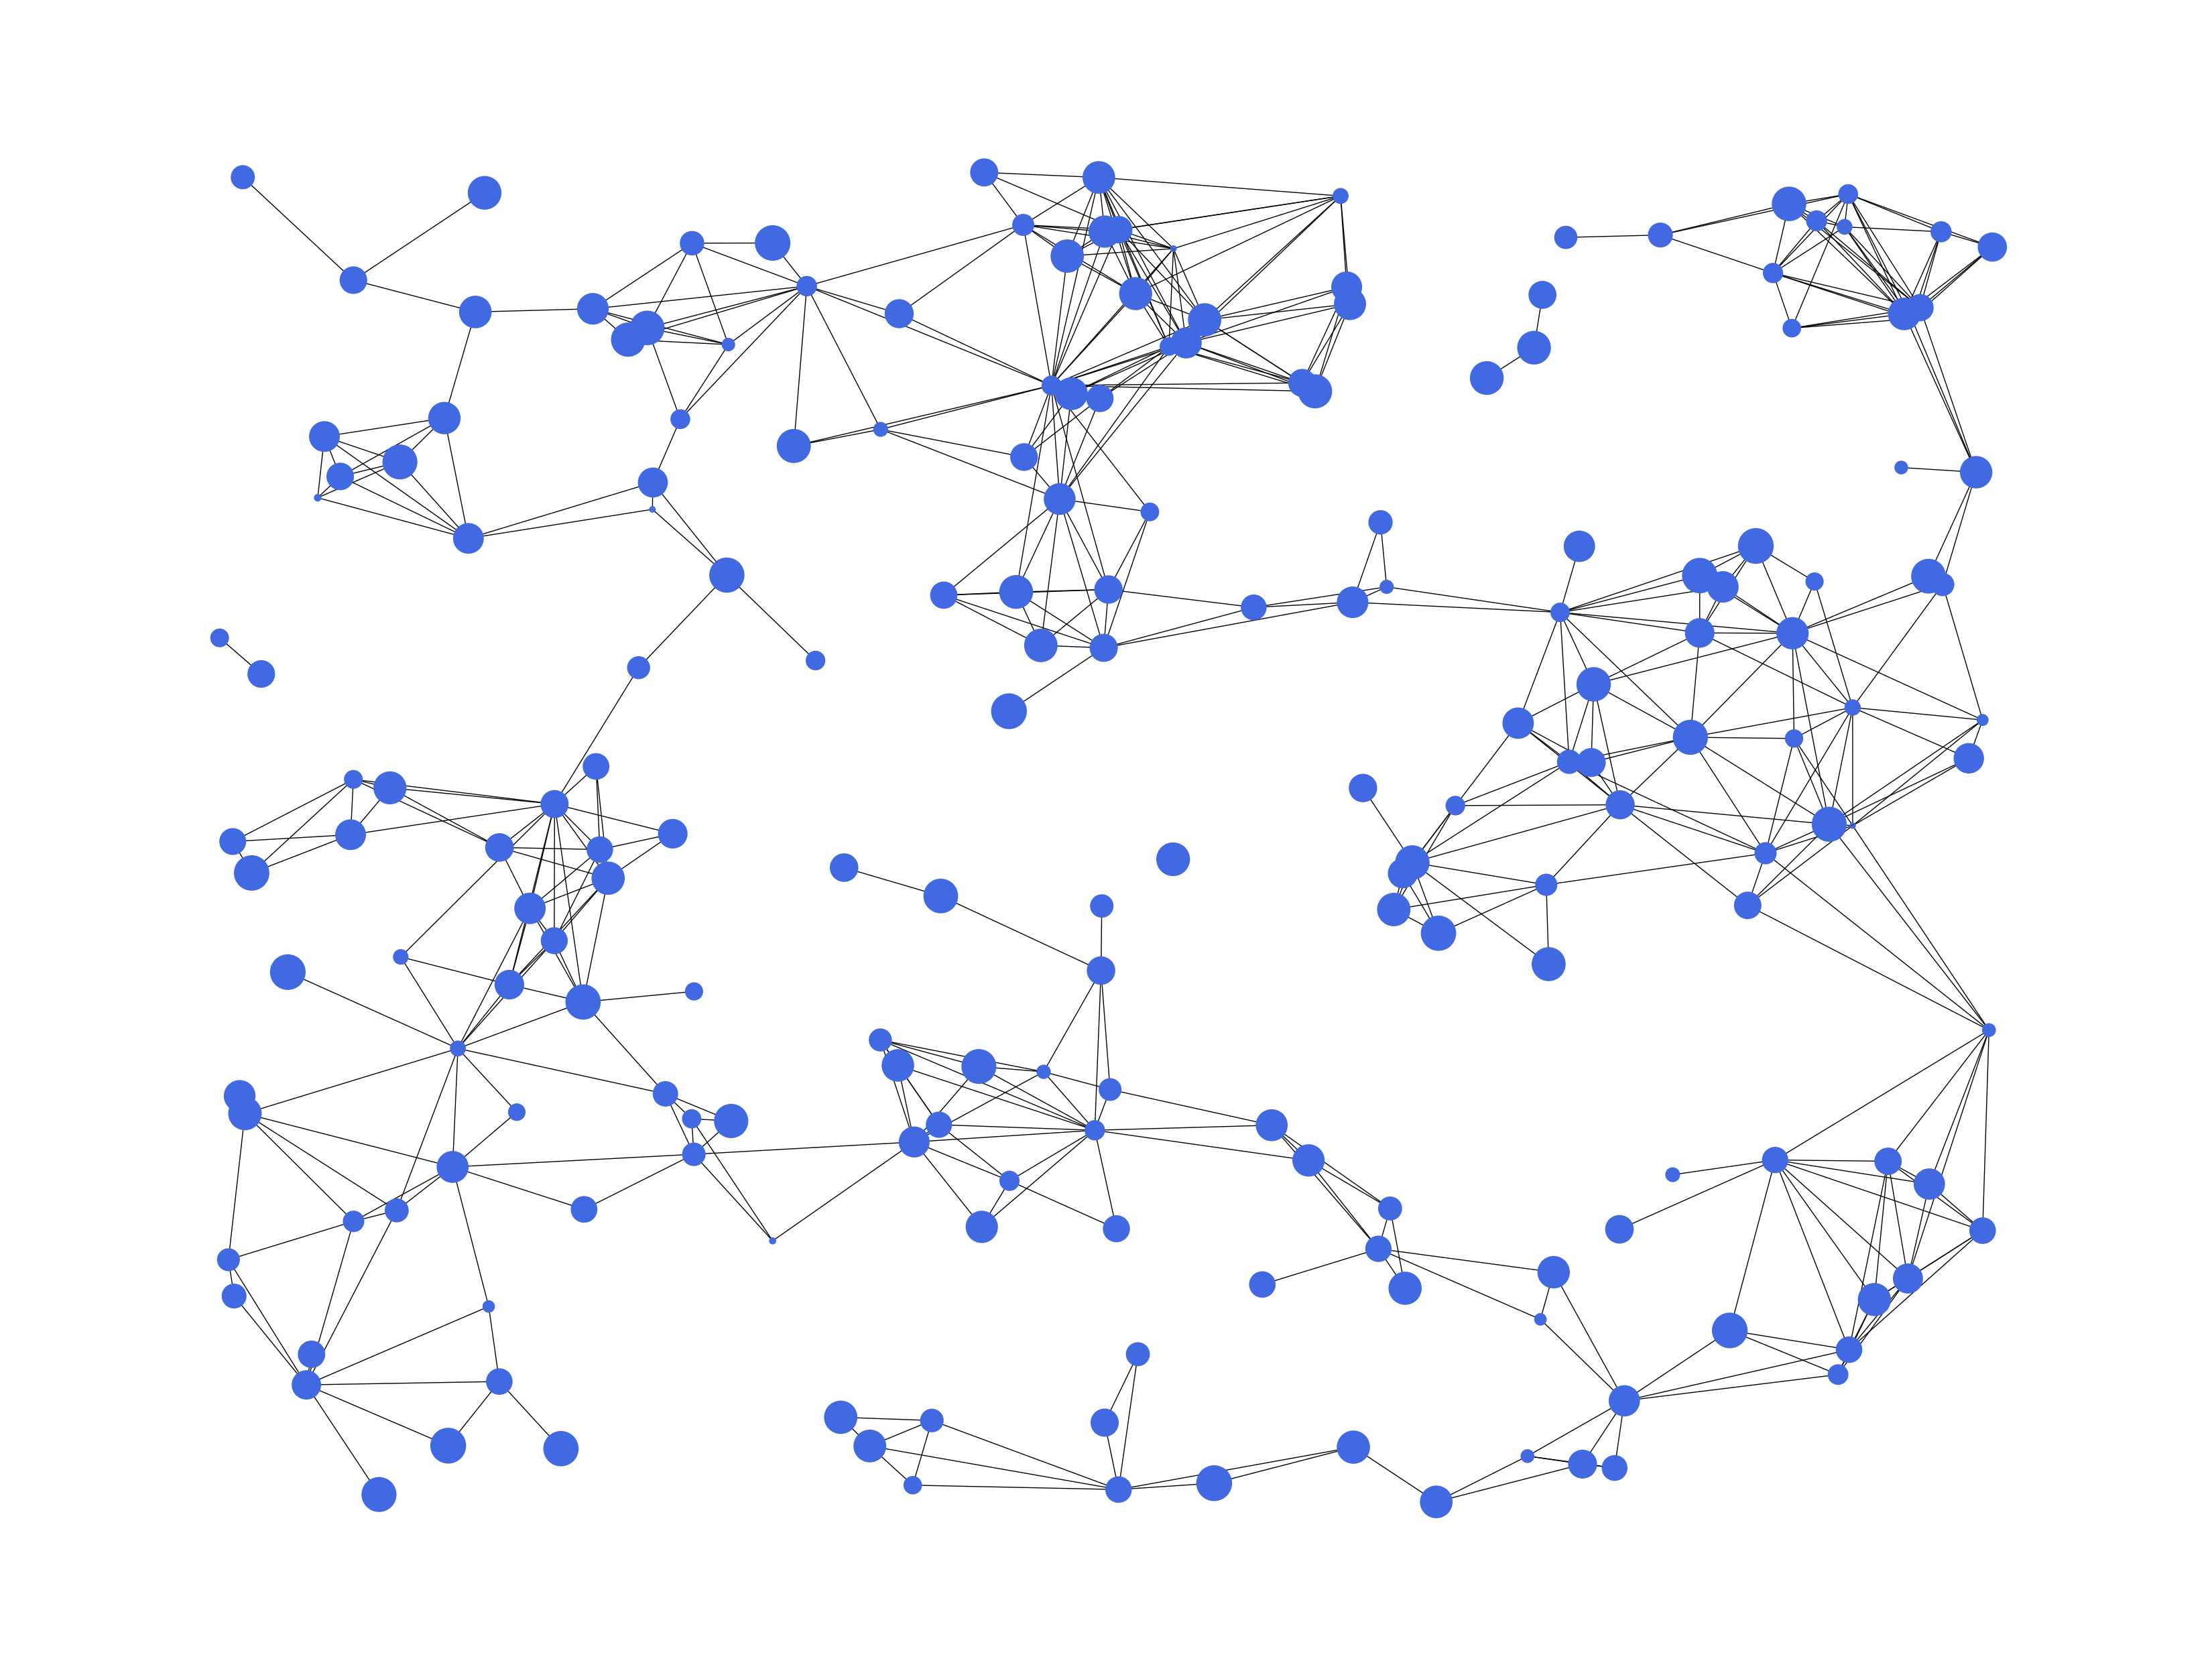

In [ ]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
# Numero de nodos = Numero de agentes
n = 200
# Pesos de los nodos = riquezas iniciales de los agentes
a_0 = np.random.rand(n)
a_0 /= np.sum(a_0)
w_0 = dict(enumerate(a_0))

theta_add = 200

GTG_add = nx.geographical_threshold_graph(
    n, theta=theta_add, dim=2)

posi = {i: GTG_add.nodes[i]["pos"] for i in range(n)}

print("Conectividad: {:.2f}".format(np.mean(list(dict(nx.degree(GTG_add)).values()))))

fig = plt.figure(dpi=500)
nx.draw(GTG_add, node_size=25 * n * a_0, width=0.2, node_color="royalblue", pos=posi)